In [ ]:
# Importamos las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.io as pio
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer
import warnings
import numpy as np
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
pio.renderers.default='browser'

# INTRODUCCION

Antes de hablar del ANALISIS EXPLORATORIO DE DATOS debemos tener en cuenta que los datos son la materia prima.
El objetivo a alcanzar es el fin, es el conocimiento que queremos obtener de esos datos.
Atraves de su organizacion, manipulacion, conociendo sus variables, relaciones, patrones, etc.
Y todo esto con herramientas como python, pandas, etc.

DATOS ----------------> CIENCIA DE DATOS -------------> OBJETIVO (respuestas que dan mis datos)

Vamos a trabajar con unos datos inventados, con duplicados, con NaN y otros inconvenientes

Conforme vayyamos avanzando iremos cargando bases de datos diferentes para poder trabajar con todas o casi todas las posibilidades y sobre todo, que sean bases ligeras para optimizar los tiempos y requerimiento del sistema.

#lo importante
Cual es el objetivo que buscamos, que informacion queremos extraer de estos datos?

Pues bien, en este caso, con EDA_00.csv queremos saber si existe alguna relacion entre las personas que hacen deporte, su formacion, su genero y su estado de salud, por lo tanto queremos clusterizar.

Por otro lado, podriamos querer saber si una persona con ciertos habitos y caracteristicas es propensa a tener un cierto estado de salud.

In [ ]:
# Traer el CSV y ver la informacion relevante

df_eda = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA/Datos/EDA_00.csv', sep=",", na_values=' ?')
# despues del separador podemos añadir header= None, para decir que este dataframe no tiene cabecera
# tamien podemos añadir na_values=' ?' para indicar que si encuetra ese caracter lo tome como NaN

# la informacion relevante para un inicio y primera toma de contacto

print('Dimensiones del df:', df_eda.shape)
print()
# Mostrar el encabezado (primeras 3 filas)
print("Encabezado del dataset:")
display(df_eda.head(3))
print()
# Mostrar 3 filas al azar
print("\n3 filas al azar del dataset:")
display(df_eda.sample(3))
print()
# Mostrar la cola (últimas 3 filas)
print("\nCola del dataset:")
display(df_eda.tail(3))
print()
print("con info")
df_eda.info()

Dimensiones del df: (58, 11)

Encabezado del dataset:


,id cliente,nombre,apellido1,apellido2,telefono,edad,sexo,estado salud,ingresos,deporte,educacion
0,1,Alejandro,García,Navarro,631 456 789,9,hombre,Malo,Bajo,Sí,Secundaria
1,2,Mariana,Rodríguez,Reyes,55 1234 5678,22,mujer,Normal,Medio,No,Primaria
2,3,Carlos,Martínez,Romero,213 987 6543,25,hombre,Excelente,Alto,Sí,Universitaria




3 filas al azar del dataset:


,id cliente,nombre,apellido1,apellido2,telefono,edad,sexo,estado salud,ingresos,deporte,educacion
14,15,Pablo,Ortiz,Figueroa,33 3456 7890,56,hombre,Normal,Alto,Sí,Universitaria
26,51,Ricardo,Rivera,Acosta,151 234 56789,51,hombre,Excelente,Medio,Sí,Primaria
1,2,Mariana,Rodríguez,Reyes,55 1234 5678,22,mujer,Normal,Medio,No,Primaria




Cola del dataset:


,id cliente,nombre,apellido1,apellido2,telefono,edad,sexo,estado salud,ingresos,deporte,educacion
55,56,Mónica,Otegui,Lizarazu,675 321 987,33,mujer,Malo,Bajo,Sí,Primaria
56,57,Mónica,Otegui,Lizarazu,675 321 987,33,mujer,Malo,Bajo,Sí,Primaria
57,58,Mónica,Otegui,Lizarazu,675 321 987,33,mujer,Malo,Bajo,Sí,Primaria



con info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id cliente    58 non-null     int64 
 1   nombre        58 non-null     object
 2   apellido1     58 non-null     object
 3   apellido2     58 non-null     object
 4   telefono      58 non-null     object
 5   edad          58 non-null     int64 
 6   sexo          54 non-null     object
 7   estado salud  51 non-null     object
 8   ingresos      55 non-null     object
 9   deporte       55 non-null     object
 10  educacion     54 non-null     object
dtypes: int64(2), object(9)
memory usage: 5.1+ KB


Con este primer paso tenemos bastante informacion, podemos saber que nuestros datos tienen
*   58 filas
*   11 columnas
Podemos ver que las columnas tiene cabecera, asi que no es necsario poner <<header= None>>
De la misma forma podemos observar que es lo que nos vamos a encontrar tanto al principio, final y por el medio
Y con info, nos da una informacion sobre el tipo de datos por columna y los no nulos o NaN

In [ ]:
print("con describe: ")
df_eda.describe() # estadistica general


con describe: 


,id cliente,edad
count,58.000000,58.000000
mean,29.500000,42.327586
std,16.886879,17.496253
min,1.000000,9.000000
25%,15.250000,29.250000
50%,29.500000,40.500000
75%,43.750000,57.500000
max,58.000000,80.000000


Aqui solo se muestran las estadisticas de las variables numericas ya que no se puede realizarlas con string.
En el caso de que la desviacion estandart [std] daria "cero" `0`, podemos decir que toda la columna tiene el mismo valor.

In [ ]:
# En el caso que el dataframe no tenga cabeceras, para aclararnos
# Añado nombres de cabecera a las columnas para aclararse que son cada una
'''
dataset = dataset.rename(columns={0:'edad', 1:'clase de trabajo', 2:'Poblacion Similar', 3:'educacion', 4:'educacion-num', 5:'estado civil', 6:'oposicion', 7:'relacion', 8:'raza', 9:'sexo', 10:'gana', 11:'perdida', 12:'horas por semana', 13:'pais nativo', 14:'50K' })
dataset.info()
'''

In [ ]:
# Identificar filas duplicadas DE LA ORIGINAL
# df.duplicated() devuelve una serie de booleanos que indican si una fila es duplicada o no.
# Keep=False marcará todas las ocurrencias de las filas duplicadas como True (no solo las adicionales).
duplicados = df_eda[df_eda.duplicated(keep=False)]

# Paso 2: Mostrar las filas duplicadas
# display(duplicados) muestra las filas duplicadas en el DataFrame.
display(duplicados)

# Paso 3: (Opcional) Contar la cantidad de filas duplicadas
# len(duplicados) te da el número total de filas duplicadas en el DataFrame.
print(f"Total de filas duplicadas: {len(duplicados)}")
print()

,id cliente,nombre,apellido1,apellido2,telefono,edad,sexo,estado salud,ingresos,deporte,educacion


Total de filas duplicadas: 0



Observamos que no hay duplicados
#ATENCION
parece que no hay duplicados ya que en el ID CLIENTE no hay duplicados, pero si que hay registros duplicados,
esto se debe a que para que se detecte duplicados deben estar el total de las filas iguales, aunque un solo datos sea diferente y todo lo demas sea igual no se detectaran.

Por lo tanto debemos de eliminar la fila ID CLIENTE y volver a verificar

In [ ]:
# Eliminar la columna 'id cliente' del DataFrame
df_eda = df_eda.drop(labels=['id cliente'], axis= 1, inplace=False)
print("****************eliminada la columna id cliente***********************")
#____________________________________________________________
# Ver el DataFrame después de eliminar 'id cliente'


# Mostrar las primeras 5 filas del DataFrame modificado
print("\nDespués de eliminar 'id cliente':")
print(df_eda.head())

****************eliminada la columna id cliente***********************

Después de eliminar 'id cliente':
      nombre  apellido1  apellido2       telefono  edad    sexo estado salud  \
0  Alejandro     García    Navarro    631 456 789     9  hombre         Malo   
1    Mariana  Rodríguez      Reyes   55 1234 5678    22   mujer       Normal   
2     Carlos   Martínez     Romero   213 987 6543    25  hombre    Excelente   
3      Sofía      López     Vargas    7911 123456    27   mujer       Normal   
4      David  Hernández  Domínguez  176 5432 1098    30     NaN          NaN   

  ingresos deporte      educacion  
0     Bajo      Sí     Secundaria  
1    Medio      No       Primaria  
2     Alto      Sí  Universitaria  
3     Bajo      No      Postgrado  
4    Medio      Sí     Secundaria  


In [ ]:
# Volvemos a identificar filas duplicadas DE LA ORIGINAL
duplicados = df_eda[df_eda.duplicated(keep=False)]

# display(duplicados) muestra las filas duplicadas en el DataFrame.
display(duplicados)

# len(duplicados) te da el número total de filas duplicadas en el DataFrame.
print(f"Total de filas duplicadas: {len(duplicados)}")
print()

,nombre,apellido1,apellido2,telefono,edad,sexo,estado salud,ingresos,deporte,educacion
35,Julia,Rodríguez,Ochoa,658 765 432,38,mujer,Excelente,Bajo,Sí,Secundaria
48,Mónica,Otegui,Lizarazu,675 321 987,33,mujer,Malo,Bajo,Sí,Primaria
54,Julia,Rodríguez,Ochoa,658 765 432,38,mujer,Excelente,Bajo,Sí,Secundaria
55,Mónica,Otegui,Lizarazu,675 321 987,33,mujer,Malo,Bajo,Sí,Primaria
56,Mónica,Otegui,Lizarazu,675 321 987,33,mujer,Malo,Bajo,Sí,Primaria
57,Mónica,Otegui,Lizarazu,675 321 987,33,mujer,Malo,Bajo,Sí,Primaria


Total de filas duplicadas: 6



In [ ]:
# Si decides eliminar las filas duplicadas después de revisarlas
## La función drop_duplicates() elimina filas duplicadas del DataFrame.
# inplace=True significa que la eliminación se hace en el mismo DataFrame sin necesidad de reasignar.
# inplace = False debemmos de asignar con el mismo u otro nombre a un nuevo dataframe
df_eda = df_eda.drop_duplicates(inplace=False)
print(df_eda.head(5))

      nombre  apellido1  apellido2       telefono  edad    sexo estado salud  \
0  Alejandro     García    Navarro    631 456 789     9  hombre         Malo   
1    Mariana  Rodríguez      Reyes   55 1234 5678    22   mujer       Normal   
2     Carlos   Martínez     Romero   213 987 6543    25  hombre    Excelente   
3      Sofía      López     Vargas    7911 123456    27   mujer       Normal   
4      David  Hernández  Domínguez  176 5432 1098    30     NaN          NaN   

  ingresos deporte      educacion  
0     Bajo      Sí     Secundaria  
1    Medio      No       Primaria  
2     Alto      Sí  Universitaria  
3     Bajo      No      Postgrado  
4    Medio      Sí     Secundaria  


## En este paso ya tenemos mas limpio el dataframe

*   Hemos eliminado duplicados
*   Se ha eliminado la columna ID CLIENTE, una columna que no aporta informacion relevante para nuestro objetivo

En este caso en concreto y sabiendo que nuestro objetivo es encontrar una relacion que nos prediga el estado de salud, es obvio que las columnas de nombre, apellidos y telefono, no es relevante y no va a aportar ningun tipo de relacion, exactamente igual que la columna de ID CLIENTE, por lo tanto, eliminaremos las columnas innecesarias

In [ ]:
# Mostrar las cabeceras del DataFrame
print(df_eda.columns)
# Convertir a lista y mostrar
cabeceras = df_eda.columns.tolist()
print(cabeceras)
# podemos usar el metodo que mas nos interese de los dos

Index(['nombre', 'apellido1', 'apellido2', 'telefono', 'edad', 'sexo',
       'estado salud', 'ingresos', 'deporte', 'educacion'],
      dtype='object')
['nombre', 'apellido1', 'apellido2', 'telefono', 'edad', 'sexo', 'estado salud', 'ingresos', 'deporte', 'educacion']


In [ ]:
# Eliminar las columnas innecesarias del DataFrame
df_eda = df_eda.drop(labels=['nombre', 'apellido1', 'apellido2', 'telefono'], axis= 1, inplace=False)
print()

# Mostrar las primeras 5 filas del DataFrame modificado
print("\nDespués de eliminar columnas innecesarias':")
print(df_eda.head())



Después de eliminar columnas innecesarias':
   edad    sexo estado salud ingresos deporte      educacion
0     9  hombre         Malo     Bajo      Sí     Secundaria
1    22   mujer       Normal    Medio      No       Primaria
2    25  hombre    Excelente     Alto      Sí  Universitaria
3    27   mujer       Normal     Bajo      No      Postgrado
4    30     NaN          NaN    Medio      Sí     Secundaria


In [ ]:
# Para mostrar los niveles de las columnas categoricas

def contar_niveles_categoricos(df):
    # Detectar columnas categóricas
    cols_cat = df.select_dtypes(include=['object', 'category']).columns

    print("Conteo de niveles en columnas categóricas:\n")

    for col in cols_cat:
        print(f'Columna {col}: {df[col].nunique()} subniveles')

contar_niveles_categoricos(df_eda)


Conteo de niveles en columnas categóricas:

Columna sexo: 2 subniveles
Columna estado salud: 4 subniveles
Columna ingresos: 3 subniveles
Columna deporte: 2 subniveles
Columna educacion: 4 subniveles


In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   edad          54 non-null     int64 
 1   sexo          50 non-null     object
 2   estado salud  47 non-null     object
 3   ingresos      51 non-null     object
 4   deporte       51 non-null     object
 5   educacion     50 non-null     object
dtypes: int64(1), object(5)
memory usage: 3.0+ KB


#Despues de ver el info los subniveles
Podemos comprobar que hay columnas categoricas que son de tipo object, en este caso, todas son object.

#RECOMENDACION
Convertir las columnas con pocos subniveles de tipo 'object' a tipo 'category' generalmente es una buena práctica en pandas, especialmente para conjuntos de datos grandes.

Ventajas:

*    Eficiencia de memoria: Para columnas con un número limitado de valores únicos, el tipo 'category' puede reducir significativamente el uso de memoria.
*    Rendimiento mejorado: Las operaciones en columnas categóricas suelen ser más rápidas, especialmente para tareas como agrupación, clasificación y cálculo de estadísticas.
*    Semántica más clara: El tipo 'category' comunica mejor la naturaleza de los datos, indicando que son valores discretos de un conjunto finito.
*    Funcionalidad adicional: Pandas proporciona métodos específicos para datos categóricos, como reordenamiento de categorías o creación de variables dummy.
*    Prevención de errores: Ayuda a prevenir la introducción accidental de valores no válidos en la columna

Inconvenientes:

*    Overhead inicial: La conversión a 'category' tiene un costo computacional inicial, que puede no ser justificable para conjuntos de datos muy pequeños.
*   Flexibilidad reducida: Añadir nuevas categorías requiere una operación explícita, lo que puede ser inconveniente si los datos cambian frecuentemente.
*    Compatibilidad: Algunas operaciones o bibliotecas externas pueden no manejar bien el tipo 'category', aunque esto es cada vez menos común

In [ ]:
# para convertir object a category
'''
columnas_a_categoricas = ['sexo', 'estado salud', 'ingresos', 'deporte', 'educacion']
df_eda[columnas_a_categoricas] = df_eda[columnas_a_categoricas].astype('category')
df_eda.info()
'''

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   edad          54 non-null     int64   
 1   sexo          50 non-null     category
 2   estado salud  47 non-null     category
 3   ingresos      51 non-null     category
 4   deporte       51 non-null     category
 5   educacion     50 non-null     category
dtypes: category(5), int64(1)
memory usage: 1.9 KB


Sabiendo que despues de limpiar las columnas innecesarias y las filas duplicadas nos quedan 53 filas y 6 columnas y viendo los subniveles de las columnas podemos necesitar:
*   ver los datos NaN o nulos de las columnas
*   podemos ver las subcategorias y visualizar los subniveles que nos interesen

In [ ]:
# PASO IMPORTANTE EN FILAS CON VALORES NaN
# Mostrar la cantidad de datos faltantes (marcados como NaN) en cada columna
df_eda.isna().sum()

,0
edad,0
sexo,4
estado salud,7
ingresos,3
deporte,3
educacion,4



Análisis de la columna 'sexo':
sexo
hombre    25
mujer     25
Name: count, dtype: int64


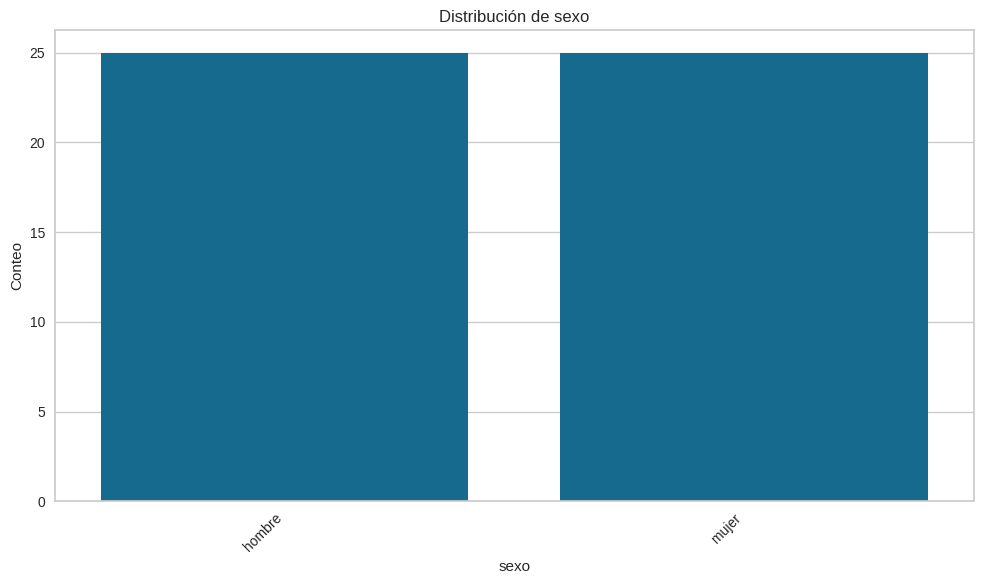


Análisis de la columna 'estado salud':
estado salud
Malo         25
Excelente    10
Normal        9
Otro          3
Name: count, dtype: int64


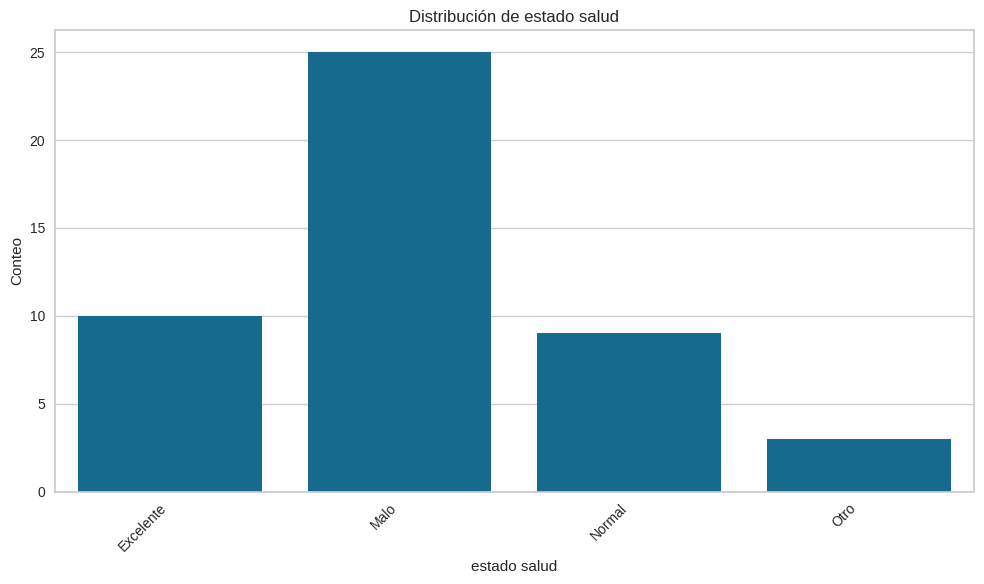


Análisis de la columna 'ingresos':
ingresos
Bajo     19
Medio    18
Alto     14
Name: count, dtype: int64


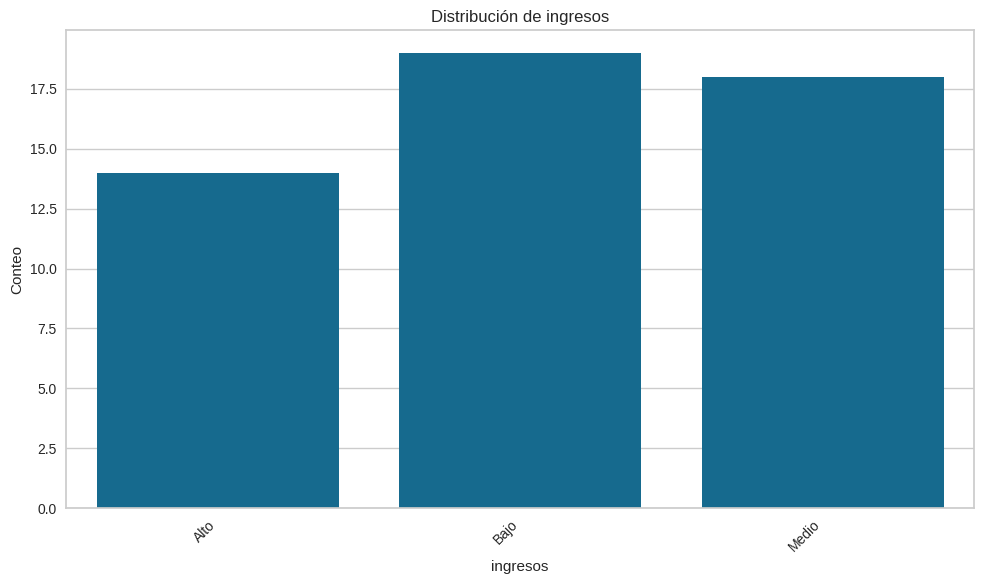


Análisis de la columna 'deporte':
deporte
Sí    27
No    24
Name: count, dtype: int64


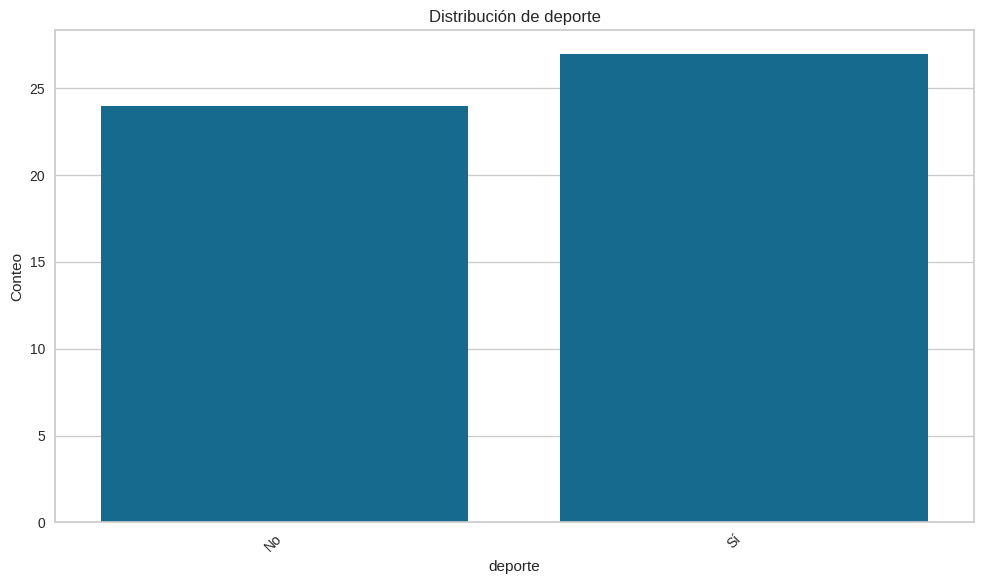


Análisis de la columna 'educacion':
educacion
Secundaria       15
Universitaria    13
Primaria         12
Postgrado        10
Name: count, dtype: int64


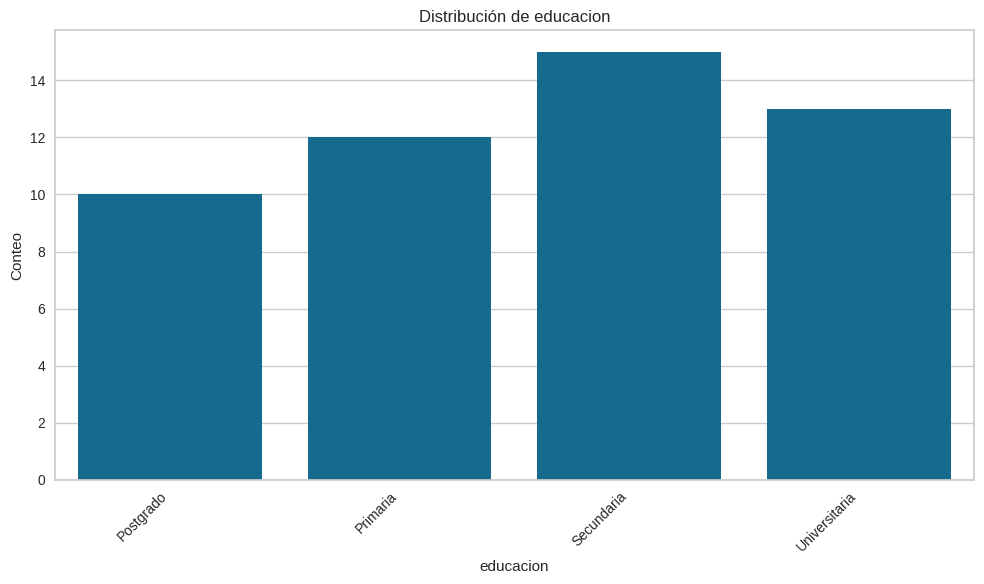

In [ ]:
# Verificar las categorias que nos interesen y visualizarlas

def analizar_y_visualizar_categoricas(df, columnas=None, max_categories=10):
    if columnas is None:
        columnas = df.select_dtypes(include=['object', 'category']).columns

    for col in columnas:
        print(f"\nAnálisis de la columna '{col}':")

        # Obtener conteos y ordenarlos de mayor a menor
        value_counts = df[col].value_counts()

        # Mostrar conteos
        print(value_counts)

        # Visualización
        plt.figure(figsize=(10, 6))
        if len(value_counts) > max_categories:
            # Si hay más categorías que max_categories, mostrar las top max_categories y agrupar el resto
            top_categories = value_counts.nlargest(max_categories)
            otros = pd.Series({'Otros': value_counts.iloc[max_categories:].sum()})
            data_to_plot = top_categories.append(otros)
        else:
            data_to_plot = value_counts

        sns.barplot(x=data_to_plot.index, y=data_to_plot.values)
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Conteo')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Uso de la función
columnas_interes = ['sexo', 'estado salud', 'ingresos', 'deporte', 'educacion']
analizar_y_visualizar_categoricas(df_eda, columnas=columnas_interes)


In [ ]:

# PASO IMPORTANTE EN FILAS CON VALORES NaN
# como sabemos que hay valores NaN, antes de verificar o visualizar los subniveles de las categorias
# debemos resolver los valores nulos o NaN
# dependiendo de la cantidad podemos visualizarlos y comprender mejor como resolver el problema

# Paso 1: Identificar filas con valores nulos o NaN
filas_con_nulos = df_eda[df_eda.isnull().any(axis=1)]

# Paso 2: Mostrar las filas que contienen valores nulos o NaN
display(filas_con_nulos)

# Paso 3: Contar la cantidad de filas con valores nulos o NaN
print(f"Total de filas con valores nulos o NaN: {len(filas_con_nulos)}")

,edad,sexo,estado salud,ingresos,deporte,educacion,edad_grupo
15,58,mujer,Malo,Medio,No,NaN,51+
29,18,mujer,Malo,Bajo,Sí,NaN,0-18
41,19,hombre,Excelente,Alto,NaN,NaN,19-30
52,60,mujer,Malo,Alto,Sí,NaN,51+


Total de filas con valores nulos o NaN: 4


## Formas de manejar datos faltantes para variables categóricas

Cuando la variable "problemática" es categórica (como el caso de la columna `sexo`) podemos usar alguno de estos enfoques:

1. Eliminar las filas con los registros faltantes
2. Eliminar la columna "problemática"
3. Imputar con la categoría más frecuente
4. Imputar los datos de una columna respecto de otracolumna


Veamos cada una de estas técnicas junto con sus ventajas y desventajas:

### 1. Eliminar filas con los registros faltantes

Consiste simplemente en quitar la fila completa para cada registro faltante.

- Ventaja: ¡es el método más simple!
- Desventajas:
  - Si el dataset es "pequeño" la eliminación puede reducir significativamente su tamaño
  - Lo anterior puede dificultar tareas posteriores como, por ejemplo, el uso de modelos de *Machine Learning* para generar predicciones

En el caso que nos interesa esta eliminación implica que por cada fila donde falta el dato del `sexo` también eliminaremos la información correspondiente a las columnas `estado salud` , `depote` y `educacion`.

La eliminación se puede hacer con el método `dropna()` de Pandas, que permite eliminar los registros que contienen datos *NaN*:

In [ ]:
df_filas = df_eda.dropna(axis=0) # Axis = 0: eliminar filas
df_filas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 0 to 53
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   edad          36 non-null     int64 
 1   sexo          36 non-null     object
 2   estado salud  36 non-null     object
 3   ingresos      36 non-null     object
 4   deporte       36 non-null     object
 5   educacion     36 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.0+ KB


Podemos apreciar que en un principio teniamos 58 filas, despues de quitar duplicados quedan 53, pero si quitamos los NaN nos quedamos con 36, son demasiados datos eliminados, en este caso esta no es la solucion viable.

### 2. Eliminar columnas con los registros faltantes

Consiste simplemente en quitar la columna "problemática":

- Ventaja: ¡es el método más simple!
- Desventajas:
  - La eliminación de la columna "problema" puede dificultar tareas posteriores
  - ¿Vale la pena eliminar toda una columna cuando tan sólo faltan unos cuantos datos?
  - Como en este caso, que tenemos muchas columnas con datos NaN, nos quedamos sin datos

De nuevo, podemos usar el método `dropna()`:

In [ ]:
df_cols = df_eda.dropna(axis=1) # Axis = 1: eliminar columna(s)
df_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 0 to 53
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   edad    54 non-null     int64
dtypes: int64(1)
memory usage: 864.0 bytes


No hace falta hacer ningun comentario al respecto, literalmente nos quedamos sin datos

In [ ]:
# verificacion de los datos nulos en las subcategorias de las columnas
sexo = df_eda['sexo'].value_counts()
salud = df_eda['estado salud'].value_counts()
ingresos = df_eda['ingresos'].value_counts()
deporte = df_eda['deporte'].value_counts()
educacion = df_eda['educacion'].value_counts()
print(f"Los NaN de la columna sexo es: {sexo} ")
print(f"Los NaN de la columna salud es: {salud} ")
print(f"Los NaN de la columna ingresos es: {ingresos} ")
print(f"Los NaN de la columna deporte es: {deporte} ")
print(f"Los NaN de la columna educacion es: {educacion} ")

Los NaN de la columna sexo es: sexo
hombre    25
mujer     25
Name: count, dtype: int64 
Los NaN de la columna salud es: estado salud
Malo         25
Excelente    10
Normal        9
Otro          3
Name: count, dtype: int64 
Los NaN de la columna ingresos es: ingresos
Bajo     19
Medio    18
Alto     14
Name: count, dtype: int64 
Los NaN de la columna deporte es: deporte
Sí    27
No    24
Name: count, dtype: int64 
Los NaN de la columna educacion es: educacion
Secundaria       15
Universitaria    13
Primaria         12
Postgrado        10
Name: count, dtype: int64 


### 3. Imputar con la categoría más frecuente

Consiste en encontrar, en la columna y el subnivel con NaN. En ese subnivel donde estan los NaN sustituirlos por los valores con mayor frecuencia y usarla para completar los datos faltantes.

En este caso en la columna sexo la frecuencia es la misma para ambos sexos, masculino y femenino

- Ventaja: no se eliminan ni filas ni columnas.
- Desventaja: esta imputación puede generar sesgos

Para realizar esta imputación podemos usar el método `fillna()` de Pandas que nos permite "rellenar" los *NaN* con el valor que especifiquemos:

In [ ]:
# rellenar los datos faltantes
# Generar una copia del DataFrame original
df_frec = df_eda.copy()

# Tomar la columna "sexo" y usar "fillna" para rellenar los valores
# faltantes con la categoría "masculino"
df_frec['sexo'] = df_frec['sexo'].fillna('masculino')

# Verificar que ya no hay valores faltantes
print("los datos NaN son:", df_frec['sexo'].isna().sum())

los datos NaN son: 0


Estamos asumiendo que los datos faltantes los sustituimos por la moda, en este caso es el estado de salud MALO, realmente no sabemos que consecuencias puede traer esta suposicion, pero siempre es mejor que eliminar los datos en este caso.

In [ ]:
# Asumiendo que en "LOS DE TIPO OBJECT" los NaN se sustituyen por la moda
# ya que es un objet y no se puede hacer la media

# Calcular la moda de la columna
moda = df_eda['estado salud'].mode()[0]

# Mostrar la moda
print(f"La moda de la columna es: {moda}")

# Sustituir los valores NaN por la moda
df_eda['estado salud'] = df_eda['estado salud'].fillna(moda)

# Verificar el resultado
print(df_eda['estado salud'].head())

La moda de la columna es: Malo
0         Malo
1       Normal
2    Excelente
3       Normal
4         Malo
Name: estado salud, dtype: object


In [ ]:
# Asumiendo que en "LOS DE TIPO OBJECT" los NaN se sustituyen por la moda
# ya que es un objet y no se puede hacer la media

# Calcular la moda de la columna
moda = df_eda['ingresos'].mode()[0]

# Mostrar la moda
print(f"La moda de la columna es: {moda}")

# Sustituir los valores NaN por la moda
df_eda['ingresos'] = df_eda['ingresos'].fillna(moda)

# Verificar el resultado
print(df_eda['ingresos'].head())

La moda de la columna es: Bajo
0     Bajo
1    Medio
2     Alto
3     Bajo
4    Medio
Name: ingresos, dtype: object


In [ ]:
# para realizar el proceso de relleno de la moda a varias columnas a la vez

def rellenar_nan_con_moda(df, columnas):
    for columna in columnas:
        # Calcular la moda de la columna
        moda = df[columna].mode().iloc[0]

        # Rellenar los valores NaN con la moda
        df[columna].fillna(moda, inplace=True)

    return df

# las columnas categóricas son 'ingresos', 'deporte', 'educacion'
columnas_categoricas = ['sexo', 'ingresos', 'deporte', 'educacion']

# Aplicar la función
df_eda = rellenar_nan_con_moda(df_eda, columnas_categoricas)

print(df_eda[columnas_categoricas].isnull().sum())



sexo         0
ingresos     0
deporte      0
educacion    0
dtype: int64


## 4. Formas de manejar datos faltantes para variables numericas respecto de otras

*   Variables de referencia numericas
*   Variables de referencia categóricas
*   Y viceversa

La función **imputar_basado_en_referencia** se mantiene igual, ya que puede manejar tanto variables numéricas como categóricas.

Usamos esta función para imputar 'sexo' basado en 'sueldo' y 'sueldo' basado en 'educacion'. Puedes ajustar estas combinaciones según tus necesidades específicas.


*   Verificamos los resultados mostrando el número de NaN restantes y las distribuciones de las variables  imputadas.
*   Añadimos una tabla de contingencia para mostrar la relación entre 'sueldo' y 'sexo' después de la imputación.
*   Incluimos un gráfico de barras para visualizar la distribución de sexo por categoría de sueldo.

Consideraciones adicionales:

**Asegúrate** de que 'sueldo' sea una variable categórica en tu DataFrame. Si no lo es, puedes convertirla usando df_eda['sueldo'] = df_eda['sueldo'].astype('category').

Se imputarán los datos faltantes de la variable 'Income' por el ingreso medio según el nivel de edcuacion de cada cliente.

En primer lugar se crea un dataframe con las medias, para despues, rellenar los datos faltantes con las medias correspondientes a cada categoria.

Hay que prestar atencion a que columna realizamos la media ya que los datos categoricos no se pueden calcular por ser string.

In [ ]:
# PARA DATOS CATEGORICOS

# Función para imputar basada en la moda de otra columna
def imputar_con_moda(df, columna_objetivo, columna_referencia):
    # Calcular la moda de la columna objetivo para cada categoría de la columna de referencia
    moda_por_categoria = df.groupby(columna_referencia)[columna_objetivo].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

    # Convertir a diccionario
    moda_dict = moda_por_categoria.to_dict()

    # Imputar los valores faltantes
    df[columna_objetivo] = df[columna_objetivo].fillna(df[columna_referencia].map(moda_dict))

    return df

# Aplicar la imputación
df_eda = imputar_con_moda(df_eda, 'sexo', 'educacion')

# Verificar los resultados
print("Número de NaN en 'sexo' después de la imputación:", df_eda['sexo'].isna().sum())
print("\nDistribución de 'sexo' después de la imputación:")
print(df_eda['sexo'].value_counts(dropna=False))
print("\nDistribución de 'sexo' por 'educacion' después de la imputación:")
print(df_eda.groupby('educacion')['sexo'].value_counts(normalize=True))


Número de NaN en 'sexo' después de la imputación: 0

Distribución de 'sexo' después de la imputación:
sexo
hombre    28
mujer     26
Name: count, dtype: int64

Distribución de 'sexo' por 'educacion' después de la imputación:
educacion      sexo  
Postgrado      mujer     0.600000
               hombre    0.400000
Primaria       hombre    0.750000
               mujer     0.250000
Secundaria     mujer     0.733333
               hombre    0.266667
Universitaria  hombre    0.769231
               mujer     0.230769
Name: proportion, dtype: float64


La función **imputar_basado_en_referencia** ahora determina si la columna objetivo es numérica o categórica.


Para **columnas numéricas**, usa la **mediana** como valor de imputación. La mediana es menos sensible a valores extremos que la media.


Para **columnas categóricas**, sigue usando la **moda**.


Cuando imputamos una columna categórica basada en una numérica, primero discretizamos la columna numérica en grupos. Esto es necesario porque no podemos mapear directamente valores continuos a categorías.
La función puede manejar tanto el caso de imputar una columna numérica basada en una categórica como viceversa.

Consideraciones adicionales:

Cuando imputas una columna numérica basada en una categórica, considera si la mediana es la mejor opción. En algunos casos, podrías preferir la media o incluso un modelo más complejo.


Cuando imputas una columna categórica basada en una numérica, la forma en que discretizas la columna numérica puede afectar significativamente los resultados. Ajusta los bins según tu conocimiento del dominio y la distribución de tus datos.


Siempre verifica los resultados después de la imputación para asegurarte de que sean razonables y no introduzcan sesgos no deseados en tus datos.


Este enfoque te proporciona una manera flexible de manejar la imputación entre columnas numéricas y categóricas, adaptándose a diferentes escenarios de datos.

In [ ]:
# ANTES DE APLICAR LOS METODOS DEBEMOS DE ASEGURARNOS DE QUE LAS COLUMNAS CON DATOS CATEGORICOS ESTEN TIPADO COMO astype('category')
# df_eda['ingresos'] = df_eda['ingresos'].astype('category')

In [1]:
df_eda.isna().sum()

NameError: name 'df_eda' is not defined

Número de NaN en 'sexo' después de la imputación: 0
Número de NaN en 'ingresos' después de la imputación: 0

Distribución de 'sexo' por categoría de ingresos después de la imputación:
ingresos  sexo  
Alto      hombre    0.600000
          mujer     0.400000
Bajo      mujer     0.560000
          hombre    0.440000
Medio     mujer     0.666667
          hombre    0.333333
Name: proportion, dtype: float64

Distribución de 'ingresos' por nivel de educación después de la imputación:
educacion      ingresos
Postgrado      Alto        0.454545
               Bajo        0.272727
               Medio       0.272727
Primaria       Bajo        0.687500
               Medio       0.250000
               Alto        0.062500
Secundaria     Medio       0.470588
               Bajo        0.411765
               Alto        0.117647
Universitaria  Alto        0.500000
               Bajo        0.285714
               Medio       0.214286
Name: proportion, dtype: float64

Tabla de contingencia ent

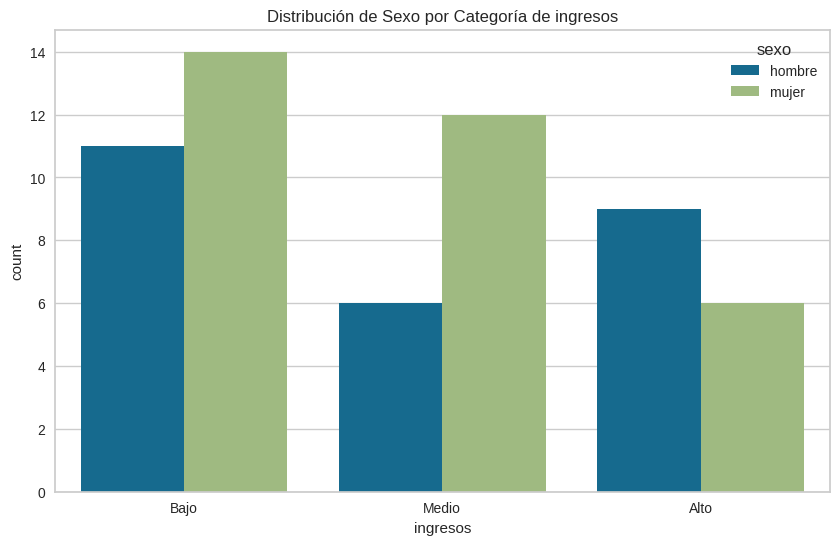

In [ ]:
# REALIZANDO DOBLES CONVERSIONES INDEPENDIENTEMENTE DE SI SON NUMERICAS O CATEGORICAS
# Y TODO A LA VEZ
# AVISO ----  NO DEBEN DE SER CATEGORY   solo object y numerical

def imputar_basado_en_referencia(df, columna_objetivo, columna_referencia):
    # Determinar si la columna objetivo es numérica
    es_numerica = pd.api.types.is_numeric_dtype(df[columna_objetivo])

    if es_numerica:
        # Para columnas numéricas, usamos la mediana
        valores_por_categoria = df.groupby(columna_referencia)[columna_objetivo].median()
    else:
        # Para columnas categóricas, usamos la moda
        valores_por_categoria = df.groupby(columna_referencia)[columna_objetivo].agg(
            lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
        )

    # Convertir a diccionario
    valores_dict = valores_por_categoria.to_dict()

    # Imputar los valores faltantes
    df[columna_objetivo] = df[columna_objetivo].fillna(df[columna_referencia].map(valores_dict))

    return df


# Para imputar 'sexo' basado en 'ingresos'
df_eda = imputar_basado_en_referencia(df_eda, 'sexo', 'ingresos')

# Para imputar 'ingresos' basado en 'educacion'
df_eda = imputar_basado_en_referencia(df_eda, 'ingresos', 'educacion')

# Para imputar 'ingresos' basado en 'educacion'
df_eda = imputar_basado_en_referencia(df_eda, 'estado salud', 'deporte')

# Para imputar 'ingresos' basado en 'educacion'
df_eda = imputar_basado_en_referencia(df_eda, 'educacion', 'ingresos')

# Para imputar 'ingresos' basado en 'educacion'
df_eda = imputar_basado_en_referencia(df_eda, 'estado salud', 'deporte')

# Para imputar 'ingresos' basado en 'educacion'
df_eda = imputar_basado_en_referencia(df_eda, 'deporte', 'ingresos')

# Para imputar 'ingresos' basado en 'educacion'
#df_eda = imputar_basado_en_referencia(df_eda, 'deporte', 'ingresos')

# Verificar los resultados
print("Número de NaN en 'sexo' después de la imputación:", df_eda['sexo'].isna().sum())
print("Número de NaN en 'ingresos' después de la imputación:", df_eda['ingresos'].isna().sum())

print("\nDistribución de 'sexo' por categoría de ingresos después de la imputación:")
print(df_eda.groupby('ingresos')['sexo'].value_counts(normalize=True))

print("\nDistribución de 'ingresos' por nivel de educación después de la imputación:")
print(df_eda.groupby('educacion')['ingresos'].value_counts(normalize=True))

# Opcional: Mostrar la tabla de contingencia
print("\nTabla de contingencia entre 'ingresos' y 'sexo':")
print(pd.crosstab(df_eda['ingresos'], df_eda['sexo'], normalize='index'))

# Opcional: Visualización
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='ingresos', hue='sexo', data=df_eda)
plt.title('Distribución de Sexo por Categoría de ingresos')
plt.show()


In [ ]:
df_eda.isna().sum()

,0
id cliente,0
nombre,0
apellido1,0
apellido2,0
telefono,0
edad,0
sexo,0
estado salud,0
ingresos,0
deporte,0


In [ ]:
# función imputar_basado_en_referencia
# Rellenar los datos faltantes con la media de su fila respecto de otra columna o con la moda
# es independiente que sean numericos o categoricas

def imputar_basado_en_referencia(df, columna_objetivo, columna_referencia):
    # Determinar si la columna objetivo es numérica o categórica
    es_numerica = pd.api.types.is_numeric_dtype(df[columna_objetivo])

    if es_numerica:
        # Para columnas numéricas, usamos la mediana
        valores_por_categoria = df.groupby(columna_referencia)[columna_objetivo].median()
    else:
        # Para columnas categóricas, usamos la moda
        valores_por_categoria = df.groupby(columna_referencia)[columna_objetivo].agg(
            lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
        )

    # Convertir a diccionario
    valores_dict = valores_por_categoria.to_dict()

    # Imputar los valores faltantes
    df[columna_objetivo] = df[columna_objetivo].fillna(df[columna_referencia].map(valores_dict))

    return df

# Para imputar una columna numérica basada en una categórica
df_eda = imputar_basado_en_referencia(df_eda, 'edad', 'educacion')

# Para imputar una columna categórica basada en una numérica

# Primero, discretizamos la columna numérica
df_eda['edad_grupo'] = pd.cut(df_eda['edad'], bins=[0, 18, 30, 50, 100], labels=['0-18', '19-30', '31-50', '51+'])
df_eda = imputar_basado_en_referencia(df_eda, 'sexo', 'edad_grupo')

# Verificar los resultados
print("Número de NaN en 'edad' después de la imputación:", df_eda['edad'].isna().sum())
print("Número de NaN en 'sexo' después de la imputación:", df_eda['sexo'].isna().sum())

print("\nDistribución de 'edad' por 'educacion' después de la imputación:")
print(df_eda.groupby('educacion')['edad'].describe())

print("\nDistribución de 'sexo' por grupo de edad después de la imputación:")
print(df_eda.groupby('edad_grupo')['sexo'].value_counts(normalize=True))



Número de NaN en 'edad' después de la imputación: 0
Número de NaN en 'sexo' después de la imputación: 0

Distribución de 'edad' por 'educacion' después de la imputación:
               count       mean        std   min   25%   50%   75%   max
educacion                                                               
Postgrado       10.0  48.700000  12.579083  27.0  41.0  49.0  58.5  66.0
Primaria        12.0  36.250000  12.863797  22.0  25.0  32.5  45.0  61.0
Secundaria      15.0  45.866667  21.642771   9.0  30.0  48.0  64.5  80.0
Universitaria   13.0  42.538462  19.653733   9.0  27.0  46.0  56.0  76.0

Distribución de 'sexo' por grupo de edad después de la imputación:
edad_grupo  sexo  
0-18        hombre    0.800000
            mujer     0.200000
19-30       hombre    0.666667
            mujer     0.333333
31-50       mujer     0.533333
            hombre    0.466667
51+         mujer     0.636364
            hombre    0.363636
Name: proportion, dtype: float64


In [ ]:
df_eda.isna().sum()

,0
edad,0
sexo,0
estado salud,0
ingresos,0
deporte,1
educacion,4
edad_grupo,0


In [ ]:
def imputar_basado_en_referencia(df, columna_objetivo, columna_referencia):
    # Determinar si la columna objetivo es numérica
    es_numerica = pd.api.types.is_numeric_dtype(df[columna_objetivo])

    if es_numerica:
        # Para columnas numéricas, usamos la mediana
        valores_por_categoria = df.groupby(columna_referencia)[columna_objetivo].median()
    else:
        # Para columnas categóricas, usamos la moda
        valores_por_categoria = df.groupby(columna_referencia)[columna_objetivo].agg(
            lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
        )

    # Convertir a diccionario
    valores_dict = valores_por_categoria.to_dict()

    # Si la columna objetivo es categórica, asegurarse de que todas las categorías estén presentes
    if pd.api.types.is_categorical_dtype(df[columna_objetivo]):
        nuevas_categorias = set(valores_dict.values()) - set(df[columna_objetivo].cat.categories)
        df[columna_objetivo] = df[columna_objetivo].cat.add_categories(nuevas_categorias)

    # Imputar los valores faltantes
    df[columna_objetivo] = df[columna_objetivo].fillna(df[columna_referencia].map(valores_dict))

    return df


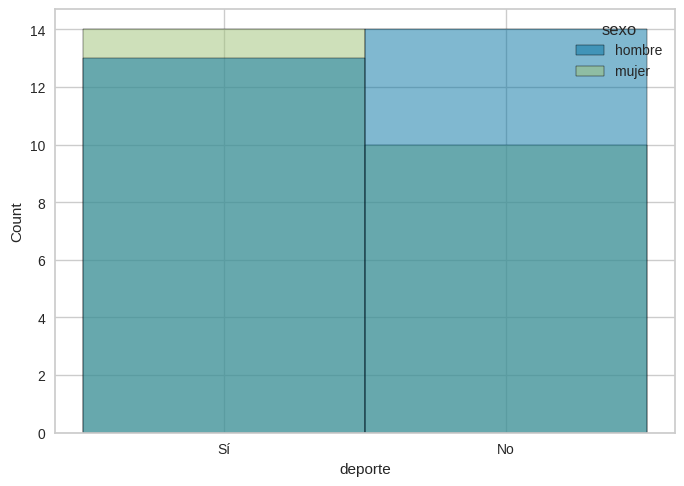

In [ ]:
# Veamos la distribución
sns.histplot(data=df_eda, x='deporte', hue='sexo');

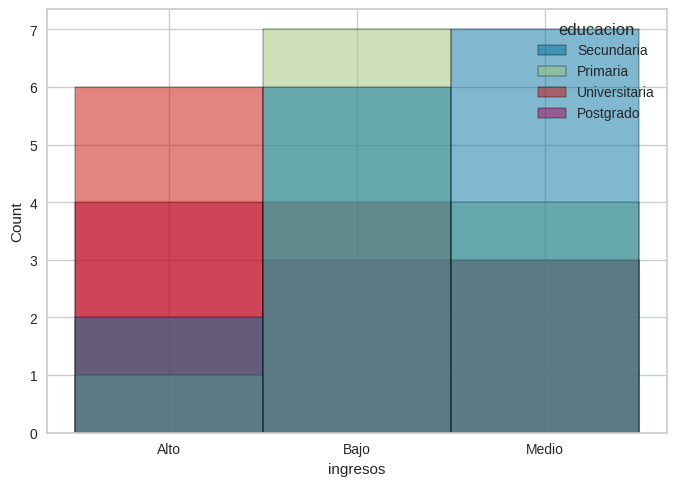

In [ ]:
# Veamos la distribución
sns.histplot(data=df_eda, x='ingresos', hue='educacion');

In [ ]:
# AHORA QUE NO TENGO NaN EN MIS DATOS

def analizar_variables_categoricas(df, max_categories=10):
    # Detectar columnas categóricas
    cols_cat = df.select_dtypes(include=['object', 'category']).columns

    print("Análisis de variables categóricas:")
    for col in cols_cat:
        n_unique = df[col].nunique()
        categories = df[col].unique()

        print(f"\nColumna '{col}':")
        print(f"  Número de categorías: {n_unique}")

        if n_unique <= max_categories:
            print("  Categorías:")
            for category in categories:
                count = df[col].value_counts()[category]
                percentage = 100 * count / len(df)
                print(f"    - {category}: {count} ({percentage:.2f}%)")
        else:
            print(f"  Más de {max_categories} categorías. Mostrando las top {max_categories}:")
            top_categories = df[col].value_counts().nlargest(max_categories)
            for category, count in top_categories.items():
                percentage = 100 * count / len(df)
                print(f"    - {category}: {count} ({percentage:.2f}%)")

analizar_variables_categoricas(df_eda)


Análisis de variables categóricas:

Columna 'nombre':
  Número de categorías: 45
  Más de 10 categorías. Mostrando las top 10:
    - Mónica: 4 (6.90%)
    - Ricardo: 3 (5.17%)
    - Isabel: 2 (3.45%)
    - Mariana: 2 (3.45%)
    - Julia: 2 (3.45%)
    - Patricia: 2 (3.45%)
    - Claudia: 2 (3.45%)
    - Lucía: 2 (3.45%)
    - Alejandro: 2 (3.45%)
    - Carlos: 2 (3.45%)

Columna 'apellido1':
  Número de categorías: 38
  Más de 10 categorías. Mostrando las top 10:
    - Otegui: 4 (6.90%)
    - Rodríguez: 4 (6.90%)
    - García: 3 (5.17%)
    - Rivera: 3 (5.17%)
    - Martínez: 3 (5.17%)
    - Díez: 2 (3.45%)
    - Gutiérrez: 2 (3.45%)
    - Castillo: 2 (3.45%)
    - Mendoza: 2 (3.45%)
    - López: 2 (3.45%)

Columna 'apellido2':
  Número de categorías: 46
  Más de 10 categorías. Mostrando las top 10:
    - Lizarazu: 4 (6.90%)
    - Acosta: 3 (5.17%)
    - Vega: 2 (3.45%)
    - Reyes: 2 (3.45%)
    - Ochoa: 2 (3.45%)
    - Ponce: 2 (3.45%)
    - Urrutia: 2 (3.45%)
    - Navarro: 2 (3.45%

In [ ]:
# SI TODAVIA HAY NaN EN MIS DATOS

def analizar_variables_categoricas(df, max_categories=10):
    # Detectar columnas categóricas
    cols_cat = df.select_dtypes(include=['object', 'category']).columns

    print("Análisis de variables categóricas:")
    for col in cols_cat:
        n_unique = df[col].nunique()
        categories = df[col].unique()

        print(f"\nColumna '{col}':")
        print(f"  Número de categorías: {n_unique}")

        # Usar value_counts con dropna=False para incluir NaN
        value_counts = df[col].value_counts(dropna=False)

        if n_unique <= max_categories:
            print("  Categorías:")
            for category, count in value_counts.items():
                percentage = 100 * count / len(df)
                category_name = 'NaN' if pd.isna(category) else category
                print(f"    - {category_name}: {count} ({percentage:.2f}%)")
        else:
            print(f"  Más de {max_categories} categorías. Mostrando las top {max_categories}:")
            top_categories = value_counts.nlargest(max_categories)
            for category, count in top_categories.items():
                percentage = 100 * count / len(df)
                category_name = 'NaN' if pd.isna(category) else category
                print(f"    - {category_name}: {count} ({percentage:.2f}%)")

# Usar la función
analizar_variables_categoricas(df_eda)


Análisis de variables categóricas:

Columna 'sexo':
  Número de categorías: 2
  Categorías:
    - hombre: 27 (50.00%)
    - mujer: 27 (50.00%)

Columna 'estado salud':
  Número de categorías: 4
  Categorías:
    - Malo: 32 (59.26%)
    - Excelente: 10 (18.52%)
    - Normal: 9 (16.67%)
    - Otro: 3 (5.56%)

Columna 'ingresos':
  Número de categorías: 3
  Categorías:
    - Bajo: 21 (38.89%)
    - Medio: 18 (33.33%)
    - Alto: 15 (27.78%)

Columna 'deporte':
  Número de categorías: 2
  Categorías:
    - Sí: 28 (51.85%)
    - No: 25 (46.30%)
    - NaN: 1 (1.85%)

Columna 'educacion':
  Número de categorías: 4
  Categorías:
    - Secundaria: 15 (27.78%)
    - Universitaria: 13 (24.07%)
    - Primaria: 12 (22.22%)
    - Postgrado: 10 (18.52%)
    - NaN: 4 (7.41%)

Columna 'edad_grupo':
  Número de categorías: 4
  Categorías:
    - 51+: 22 (40.74%)
    - 31-50: 15 (27.78%)
    - 19-30: 12 (22.22%)
    - 0-18: 5 (9.26%)


##Ya hemos terminado una parte importante

Vamos a guardar el csv sin eliminar los NaN para trabajarlo mas adelante

In [ ]:
# Guardar dataframe

df_eda_limpio = df_eda.copy()

# Definir la ruta específica donde quieres guardar el archivo
ruta = "/content/drive/MyDrive/Colab Notebooks/EDA/Datos/df_eda_limpio.csv"

# Guardar el DataFrame como CSV en la ruta especificada
df_eda_limpio.to_csv(ruta, index=False)
